In [95]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

## Model Building

I am going to build and tune random forest model because in this case tree based method would perform better. I am also interested in individual customer's churning probability and in understanding how the model calculates it using Shap values.

In [96]:
#Reading the data
df=pd.read_csv("tel_churn.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [97]:
#train test split
train, test = train_test_split(df, test_size=0.2, random_state=111, stratify = df.Churn)

In [98]:
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3101,1,0,0,0,58,1,1,1,0,0,...,79.80,4526.85,0,1,0,0,0,0,0,0
6294,0,0,0,0,1,1,0,0,0,0,...,19.70,19.70,1,0,1,0,0,0,0,1
867,1,0,0,0,5,1,0,0,0,0,...,20.50,104.30,0,0,1,0,0,0,0,1
4448,1,1,0,0,30,1,1,0,1,0,...,99.70,2967.35,1,1,0,0,0,0,1,0
4479,1,0,0,0,59,1,1,0,0,0,...,24.45,1493.10,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,1,0,0,0,22,0,0,0,0,1,...,50.60,1073.30,0,0,0,0,0,0,1,0
6418,0,0,1,0,31,1,1,0,0,1,...,79.30,2484.00,0,0,0,1,0,0,0,1
4719,0,0,0,0,36,1,1,0,0,0,...,84.90,3067.20,1,1,0,0,0,0,1,0
27,0,0,1,1,1,0,0,0,1,0,...,30.20,30.20,1,0,0,0,0,0,1,0


In [99]:
test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6759,0,1,1,0,51,1,1,1,0,1,...,93.65,4839.15,0,1,0,1,0,0,0,0
2337,1,1,0,0,56,1,1,0,1,1,...,104.75,5510.65,1,1,0,1,0,0,0,0
2586,1,0,1,1,44,1,0,0,0,0,...,19.60,780.25,0,0,1,0,0,0,0,1
3815,1,0,0,0,3,1,1,0,0,0,...,74.25,210.30,1,1,0,0,0,0,1,0
3249,1,0,1,1,10,1,0,0,1,1,...,55.55,551.30,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101,0,0,0,0,6,1,0,1,0,0,...,59.15,336.70,0,0,0,0,0,0,0,0
40,0,0,1,1,10,1,0,0,1,0,...,49.55,475.70,0,0,0,1,0,0,0,1
520,0,0,1,1,67,1,1,0,1,1,...,105.40,6989.45,0,1,0,1,0,0,1,0
3601,1,0,1,1,55,1,0,0,0,0,...,20.00,1087.25,0,0,1,0,0,1,0,0


In [100]:
#Splitting the data
x = df.columns[df.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]

In [101]:
def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf = 'coefficients'):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:,1]
    
    #coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,probabilities) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities)
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")
    
    plt.show() 

## Hyperparameters Tuning
### Grid 1: Selecting class weight and estimators

In [102]:
param_grid1 = {'max_features':['auto', 'sqrt', 'log2', None],
          'n_estimators':[300, 500, 700, 900, 1100, 1300]
         }

rf_model = RandomForestClassifier()
grid1 = GridSearchCV(estimator=rf_model, param_grid=param_grid1, n_jobs=-1, cv=5, verbose=1, scoring = 'f1')
grid1.fit(train_x, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [300, 500, 700, 900, 1100, 1300]},
             scoring='f1', verbose=1)

In [103]:
grid1.best_params_

{'max_features': 'log2', 'n_estimators': 700}

<AxesSubplot:xlabel='param_max_features', ylabel='param_n_estimators'>

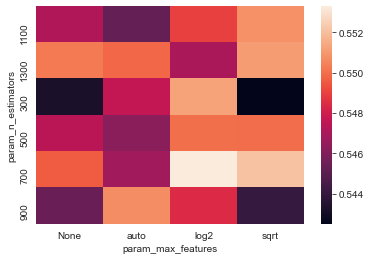

In [104]:
dt = pd.DataFrame(grid1.cv_results_)
dt.param_max_features = dt.param_max_features.astype(str)
dt.param_n_estimators = dt.param_n_estimators.astype(str)

table = pd.pivot_table(dt, values='mean_test_score', index='param_n_estimators', 
                       columns='param_max_features')
     
sns.heatmap(table)

In [105]:
grid1.cv_results_
dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.696011,0.091592,0.228260,0.026829,auto,300,"{'max_features': 'auto', 'n_estimators': 300}",0.556962,0.550781,0.547529,0.521401,0.561670,0.547668,0.014015,14
1,5.400207,0.283288,0.301463,0.028094,auto,500,"{'max_features': 'auto', 'n_estimators': 500}",0.557377,0.558140,0.527307,0.522244,0.566038,0.546221,0.017843,19
2,6.897479,0.197397,0.385207,0.007271,auto,700,"{'max_features': 'auto', 'n_estimators': 700}",0.556962,0.549323,0.537594,0.528958,0.561205,0.546808,0.012002,18
3,8.712804,0.164662,0.520728,0.046077,auto,900,"{'max_features': 'auto', 'n_estimators': 900}",0.563734,0.563107,0.538606,0.522244,0.566038,0.550746,0.017407,6
4,11.583595,0.403028,0.668754,0.053706,auto,1100,"{'max_features': 'auto', 'n_estimators': 1100}",0.554745,0.554264,0.538606,0.525292,0.553672,0.545316,0.011703,21
5,13.003579,0.519589,0.770126,0.040222,auto,1300,"{'max_features': 'auto', 'n_estimators': 1300}",0.556777,0.562620,0.544090,0.531008,0.554717,0.549842,0.011162,10
6,3.245316,0.163903,0.202828,0.052000,sqrt,300,"{'max_features': 'sqrt', 'n_estimators': 300}",0.564663,0.547945,0.520913,0.518375,0.560606,0.542500,0.019477,24
7,5.278545,0.109671,0.305013,0.015410,sqrt,500,"{'max_features': 'sqrt', 'n_estimators': 500}",0.559567,0.548638,0.534091,0.537718,0.569811,0.549965,0.013340,9
8,6.943518,0.174994,0.408549,0.017000,sqrt,700,"{'max_features': 'sqrt', 'n_estimators': 700}",0.568841,0.565385,0.539623,0.525097,0.561798,0.552148,0.016945,2
9,9.859921,0.392474,0.638207,0.113663,sqrt,900,"{'max_features': 'sqrt', 'n_estimators': 900}",0.560579,0.555340,0.531309,0.520388,0.552632,0.544050,0.015469,22


In [106]:
grid1.best_score_

0.5532928657864763

### Grid 2: Selecting max depth and split criterion

In [107]:
param_grid2 = {'max_features':['sqrt'],           #### You can change based on grid1 best param.
          'n_estimators':[1000, 1100, 1200],
           'criterion': ['entropy', 'gini'],    
          'max_depth': [7, 9, 11, 13, 15, None],
         }

rf_model = RandomForestClassifier()
grid2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2, n_jobs=-1, cv=5, verbose=1, scoring = 'f1')
grid2.fit(train_x, train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15, None],
                         'max_features': ['sqrt'],
                         'n_estimators': [1000, 1100, 1200]},
             scoring='f1', verbose=1)

In [108]:
grid2.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 1000}

<AxesSubplot:xlabel='param_criterion', ylabel='param_max_depth'>

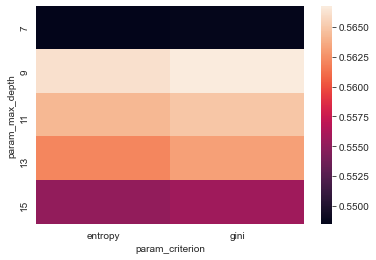

In [109]:
dt = pd.DataFrame(grid2.cv_results_)

table = pd.pivot_table(dt, values='mean_test_score', index='param_max_depth', 
                       columns='param_criterion')
     
sns.heatmap(table)

<AxesSubplot:xlabel='param_n_estimators', ylabel='param_max_depth'>

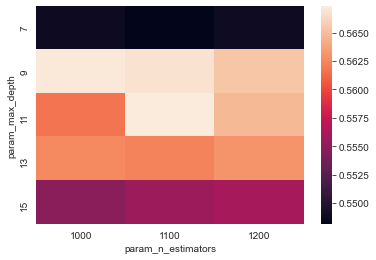

In [110]:
table = pd.pivot_table(dt, values='mean_test_score', index='param_max_depth', 
                       columns='param_n_estimators')
     
sns.heatmap(table)

In [111]:
grid2.best_score_

0.5681438279857095

Checking if other depth and estimator value results better

In [112]:
param_grid2_2 = {'max_features':['auto'],
                 'n_estimators':[950, 1000, 1050],
                 'criterion': ['entropy'],    
                 'max_depth': [10, 11, 12],
         }

rf_model = RandomForestClassifier()
grid2_2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2_2, n_jobs=-1, cv=5, verbose=1, scoring = 'f1')
grid2_2.fit(train_x, train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': [950, 1000, 1050]},
             scoring='f1', verbose=1)

In [113]:
grid2_2.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 1050}

In [114]:
grid2_2.best_score_

0.5699798061342785

### Grid 3: Selecting minimum samples leaf and split

In [115]:
param_grid3 = {'max_features':['sqrt'],
               'n_estimators':[1000],
               'criterion': ['gini'],    
               'max_depth': [9],
               'min_samples_leaf': [1, 3, 5, 7],
               'min_samples_split': [2, 4, 6, 8]
         }

rf_model = RandomForestClassifier()
grid3 = GridSearchCV(estimator=rf_model, param_grid=param_grid3, n_jobs=-1, cv=5, verbose=1, scoring = 'f1')
grid3.fit(train_x, train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [9],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [1000]},
             scoring='f1', verbose=1)

In [116]:
grid3.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 1000}

<AxesSubplot:xlabel='param_min_samples_split', ylabel='param_min_samples_leaf'>

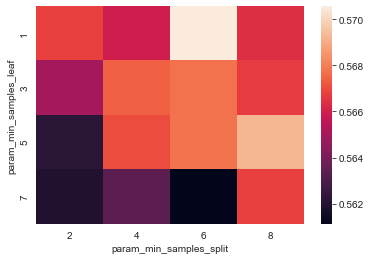

In [117]:
dt = pd.DataFrame(grid3.cv_results_)

table = pd.pivot_table(dt, values='mean_test_score', index='param_min_samples_leaf', 
                       columns='param_min_samples_split')
     
sns.heatmap(table)

In [118]:
grid3.best_score_

0.5705666429454712

### Grid 4: Selecting class weight

In [119]:
param_grid4 = {'class_weight':[{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}],
            'max_features':['sqrt'],
          'n_estimators':[1000],
           'criterion': ['gini'],    
          'max_depth': [9],
          'min_samples_leaf': [3],
          'min_samples_split': [6]
         }

rf_model = RandomForestClassifier()
grid4 = GridSearchCV(estimator=rf_model, param_grid=param_grid4, n_jobs=-1, cv=5, verbose=1, scoring = 'f1')
grid4.fit(train_x, train_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}],
                         'criterion': ['gini'], 'max_depth': [9],
                         'max_features': ['sqrt'], 'min_samples_leaf': [3],
                         'min_samples_split': [6], 'n_estimators': [1000]},
             scoring='f1', verbose=1)

In [120]:
grid4.best_params_

{'class_weight': {0: 1, 1: 3},
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 1000}

<AxesSubplot:ylabel='param_class_weight'>

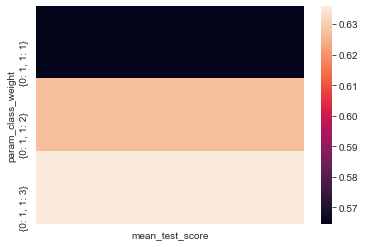

In [121]:
dt = pd.DataFrame(grid4.cv_results_)
dt.param_class_weight = dt.param_class_weight.astype(str)
table = pd.pivot_table(dt, values='mean_test_score', index='param_class_weight')
     
sns.heatmap(table)

In [122]:
grid4.best_score_

0.635797840843084

In [123]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=9,
                       max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=6, n_estimators=1000)

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.74      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Accuracy   Score :  0.7665010645848119
Area under curve :  0.8490041075718826 



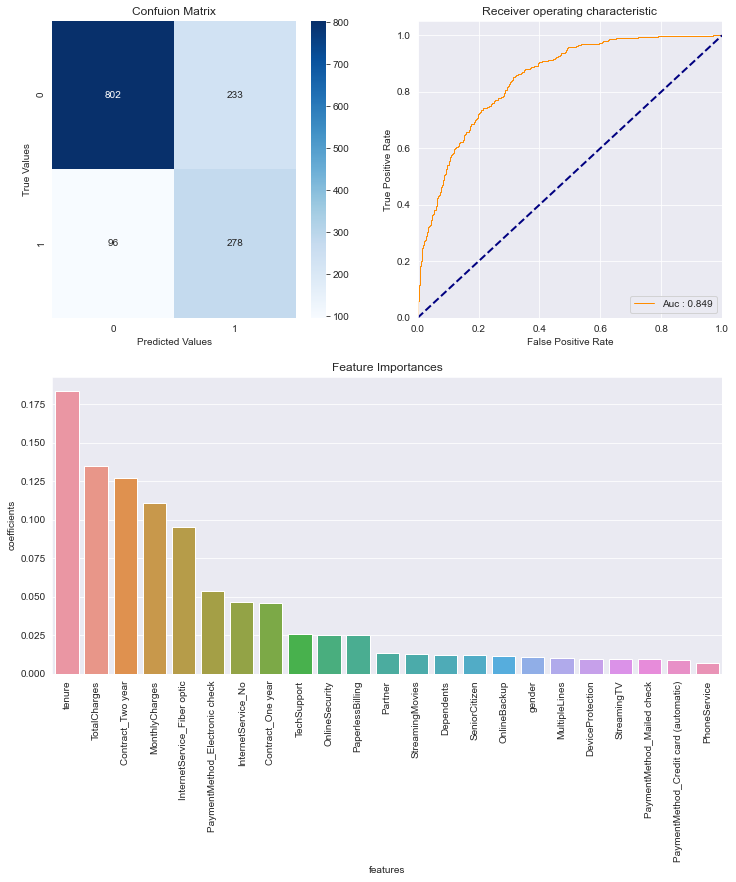

In [124]:
churn_prediction(model, train_x, train_y, test_x, test_y, x,"features")

Checking the model's performance on train data itself

In [125]:
train_scores = cross_val_score(model, train_x, train_y, cv = 5, scoring='f1')
train_scores

array([0.60330579, 0.66002845, 0.62809917, 0.61959654, 0.64812239])

In [126]:
np.mean(train_scores)

0.6318304684355937

In [127]:
test_scores = cross_val_score(model, test_x, test_y, cv = 5, scoring='f1')
test_scores

array([0.6097561 , 0.66285714, 0.5952381 , 0.5875    , 0.63636364])

In [128]:
np.mean(train_scores)

0.6318304684355937

As we can see that the performance of the model on test data is same as training data. So, we can conclude that there is no overfitting and underfitting.

### Explaining the model

In [129]:
import eli5
from eli5.sklearn import PermutationImportance

from pdpbox import pdp, info_plots

In [130]:
perm = PermutationImportance(model, random_state=1).fit(test_x, test_y)
eli5.show_weights(perm, feature_names = test_x.columns.tolist())

Weight,Feature
0.0175 ± 0.0105,InternetService_Fiber optic
0.0021 ± 0.0009,SeniorCitizen
0.0018 ± 0.0102,Contract_One year
0.0014 ± 0.0024,PaymentMethod_Electronic check
0.0011 ± 0.0053,InternetService_No
0.0010 ± 0.0039,gender
-0.0001 ± 0.0023,OnlineBackup
-0.0007 ± 0.0052,TechSupport
-0.0010 ± 0.0017,OnlineSecurity
-0.0010 ± 0.0045,PaymentMethod_Mailed check


Visualizing how the partial dependance plots look for top features

### Internet Service: Fiber Optic

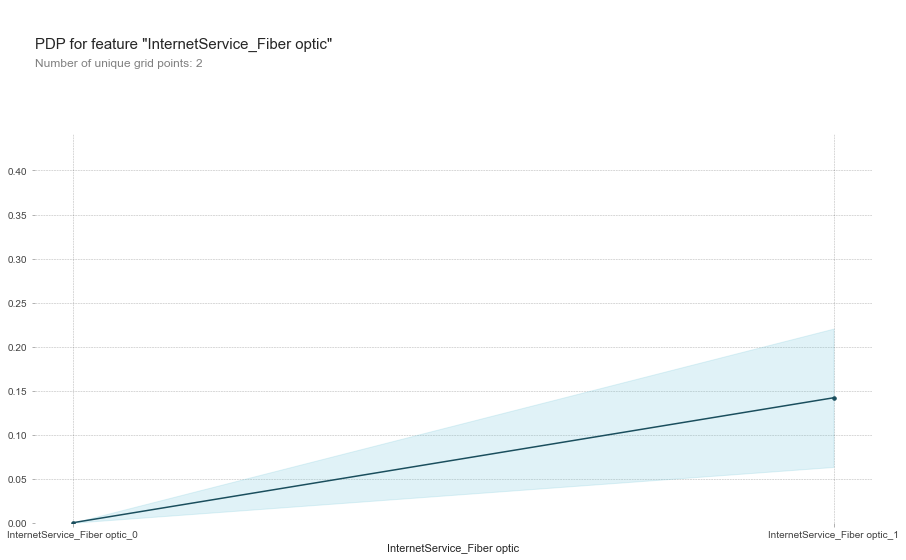

In [131]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, 
                        feature='InternetService_Fiber optic')
pdp.pdp_plot(pdp_p, 'InternetService_Fiber optic')
plt.show()

### Payment Method: Mailed Check

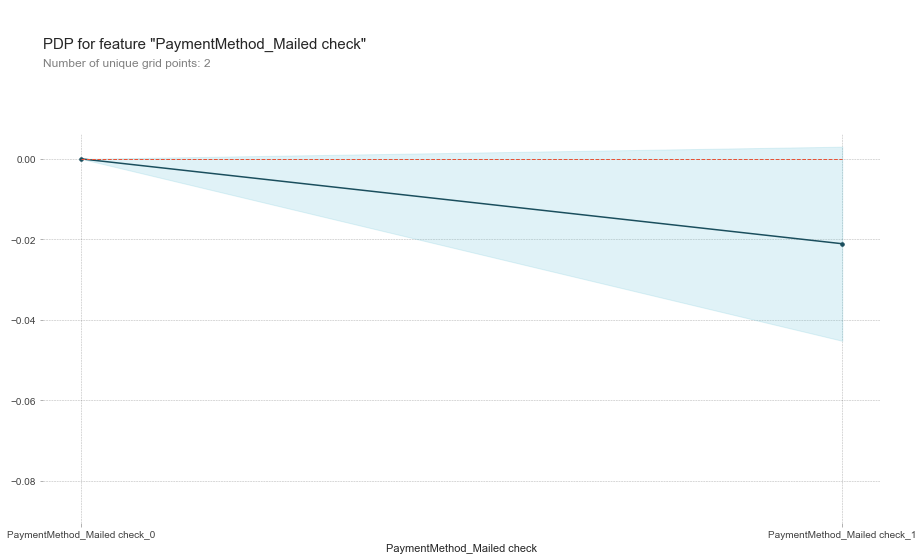

In [132]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, 
                        feature='PaymentMethod_Mailed check')
pdp.pdp_plot(pdp_p, 'PaymentMethod_Mailed check')
plt.show()

### Monthly Charges

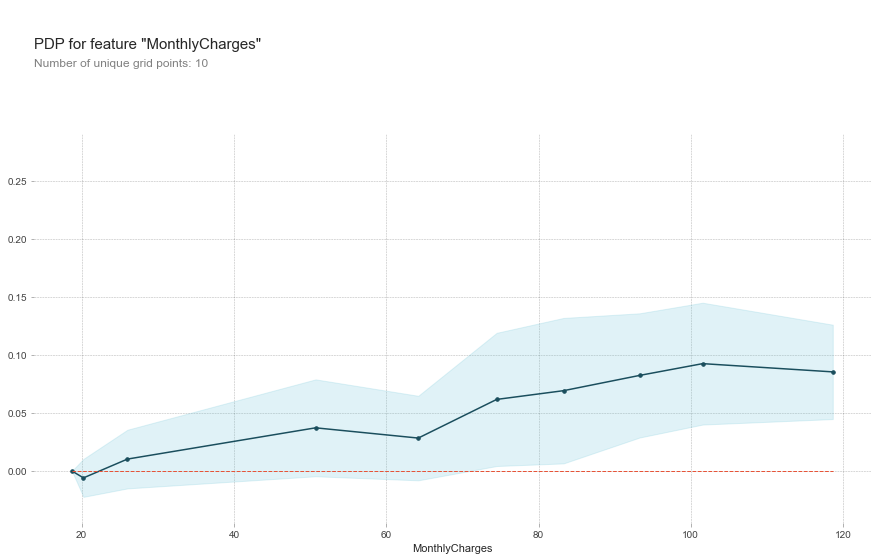

In [133]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, feature='MonthlyCharges')
pdp.pdp_plot(pdp_p, 'MonthlyCharges')
plt.show()

### Total Charges

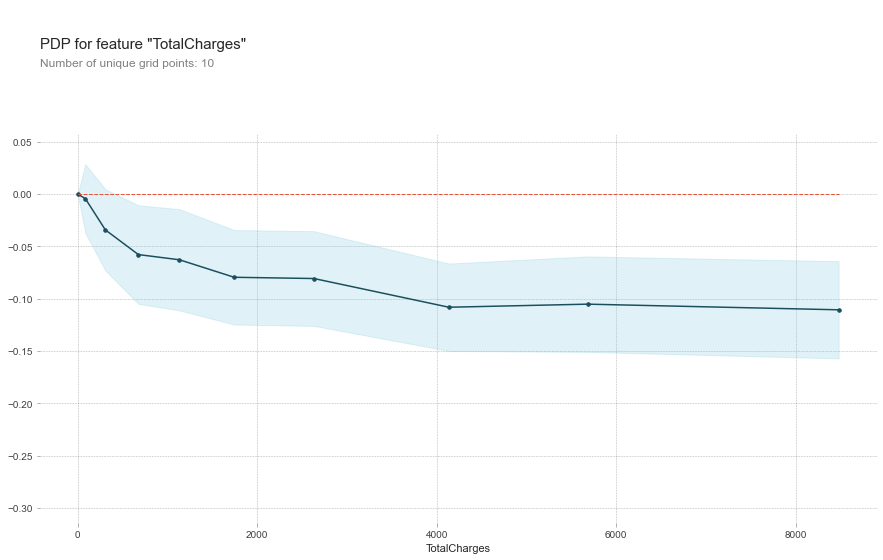

In [134]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, feature='TotalCharges')
pdp.pdp_plot(pdp_p, 'TotalCharges')
plt.show()

### Contract - Two years

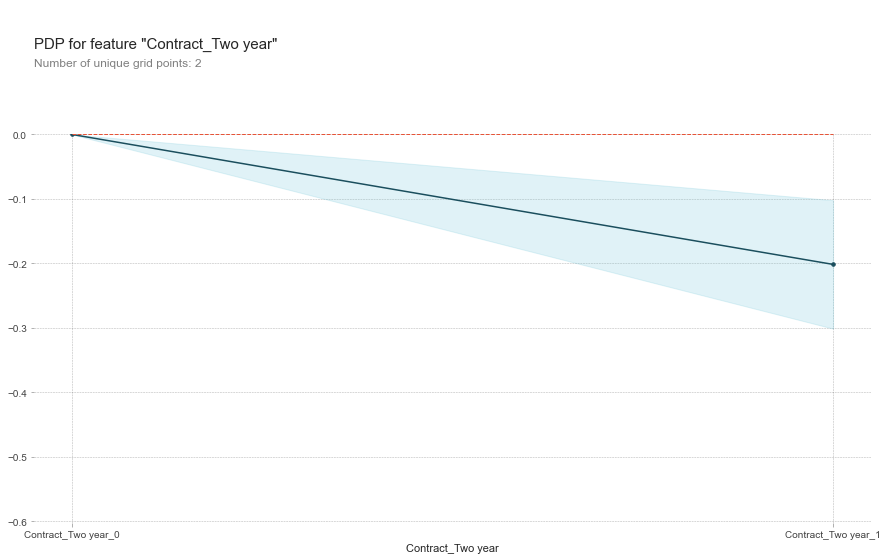

In [135]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, 
                        feature='Contract_Two year')
pdp.pdp_plot(pdp_p, 'Contract_Two year')
plt.show()

### Tenure

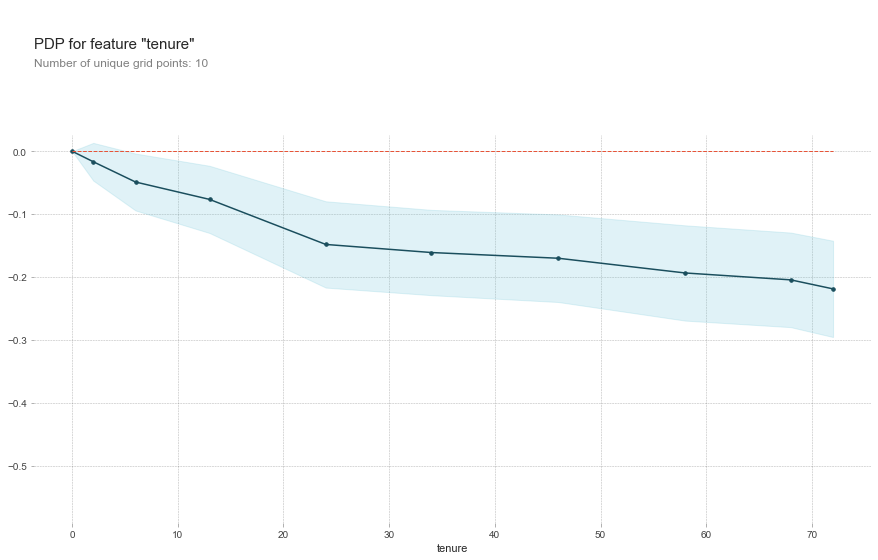

In [136]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, 
                        feature='tenure')
pdp.pdp_plot(pdp_p, 'tenure')
plt.show()

### Shap Values

In [137]:
import shap 
shap.initjs()

import joblib

In [138]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(np.array(test_x.iloc[0]))
shap.force_plot(explainer.expected_value[1], shap_values[1], test_x.iloc[0])

In [139]:
# Saving Explainer
ex_filename = 'explainer.bz2'
joblib.dump(explainer, filename=ex_filename, compress=('bz2', 9))

['explainer.bz2']

### Gauge Chart

In [140]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], Probability=1, fname=False): 
    
    N = len(labels)
    colors = colors[::-1]

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(4)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, 'Churn Probability ' + np.round(Probability,2).astype(str), horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

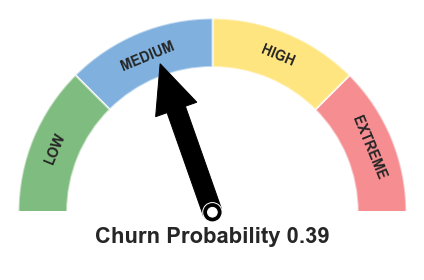

In [141]:
gauge(Probability=model.predict_proba(test_x.iloc[0:1])[0,1])

### Applying SMOTE method

As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [142]:
X_=df.drop('Churn',axis=1)
X_

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,84.80,1990.50,0,0,1,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,1,103.20,7362.90,1,0,1,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,29.60,346.45,0,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,1,74.40,306.60,1,0,0,0,0,0,1


In [143]:
y_=df['Churn']
y_

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [144]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X_,y_)

In [145]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [146]:
model_rf_smote = RandomForestClassifier(n_estimators=1000, 
                                        criterion = "gini", 
                                        random_state = 100, 
                                        max_depth=9, 
                                        min_samples_leaf=3)

In [147]:
model_rf_smote.fit(xr_train,yr_train)
yr_predict = model_rf_smote.predict(xr_test)
model_score_r = model_rf_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.950469684030743
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       564
           1       0.94      0.97      0.95       607

    accuracy                           0.95      1171
   macro avg       0.95      0.95      0.95      1171
weighted avg       0.95      0.95      0.95      1171



In [148]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[527  37]
 [ 21 586]]


Now we can see quite better results, i.e. Accuracy: 93 %, and a very good recall, precision & f1 score for minority class.

### Performing PCA

In [149]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train)
xr_test_pca = pca.transform(xr_test)
explained_variance = pca.explained_variance_ratio_

In [150]:
model_rf_pca=RandomForestClassifier(n_estimators=1000, criterion='gini', random_state = 100,max_depth=9, min_samples_leaf=3)

In [151]:
model_rf_pca.fit(xr_train_pca, yr_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=3, n_estimators=1000,
                       random_state=100)

In [152]:
yr_predict_pca = model_rf_pca.predict(xr_test_pca)

In [153]:
model_score_r_pca = model_rf_pca.score(xr_test_pca, yr_test)

In [154]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test, yr_predict_pca))

0.740392826643894
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       564
           1       0.74      0.77      0.75       607

    accuracy                           0.74      1171
   macro avg       0.74      0.74      0.74      1171
weighted avg       0.74      0.74      0.74      1171



With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)

In [155]:
import pickle
filename = 'model.sav'
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [157]:
load_model = pickle.load(open(filename, 'rb'))
model_score_r1 = load_model.score(xr_test, yr_test)
model_score_r1

0.950469684030743